In [165]:
import skimage.io
import numpy as np
import matplotlib.pyplot as plt
import skimage.transform
import skimage.color
import skimage.draw

In [166]:
# 1. masking
# 2. make histogram 
# use 1 and 2 to do thresholding

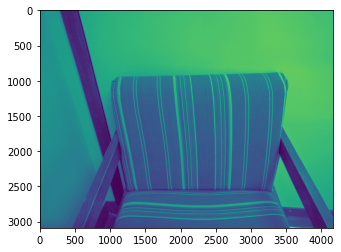

In [167]:
# step 0: make a color image into gray scale image
# read the image
chair = skimage.io.imread(fname='img_processing_data/chair.jpg')

# convert to grayscale image using skimage.color.rgb2gray
gray_chair =skimage.color.rgb2gray(chair)

# visualize the image
plt.imshow(gray_chair) # color didn't render correctly, which used another scale (green to blue, rather than white to black)

In [168]:
# try out masking
# load the "maize_root.tif" image
maize = skimage.io.imread(fname='img_processing_data/maize-roots.tif')

In [169]:
# create the blank mask
mask = np.ones(shape=maize.shape[0:2], dtype='bool') # True/False, false = 0, true = 1 -> false = black, true = white

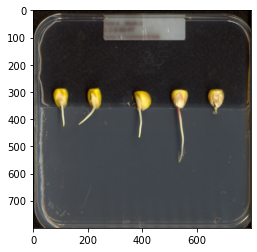

In [170]:
plt.imshow(maize)

In [171]:
# draw a rectangular black area in this blank mask
rr,cc = skimage.draw.rectangle(start = (357,44), end = (740, 720))

In [172]:
# when you combine rr and cc, you get all the coordinates for pixels in the rectangular area
# and we assign areas with boolean value False
mask[rr, cc]=False # why should I assign False here, where False (0) is black
# the entire mask as black, which means
# mask = np.zeros(shape=image.shape[0:2], dtype='bool')
# mask[rr,cc] = True # why this is not going to work, or how you think you can make this reversed mask work?
# ****** please think about it!

In [173]:
maize[mask] = 0 # this is line that makes all the differences. This has something to do with masking an array
# only where the mask has value true can be assigned with 0 (which means black)
# that is why we assigned the area we are interested at the begining with False

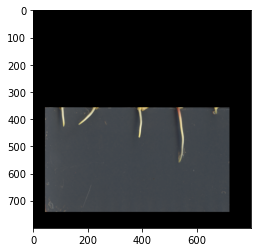

In [174]:
plt.imshow(maize)

In [175]:
# thresholding practice

In [176]:
# load the image
junk = skimage.io.imread(fname='img_processing_data/06-junk-before.jpg')

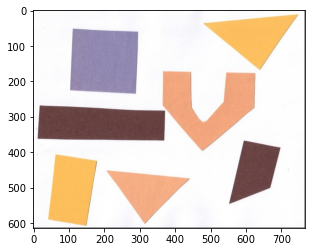

In [177]:
plt.imshow(junk) # check how the image looks like

In [178]:
# convert a color image into a gray scale image
gray_junk = skimage.color.rgb2gray(junk)

In [179]:
sigma = 0.2 # set sigma for guassian filter
blur_gray_junk = skimage.filters.gaussian(gray_junk, sigma=sigma)

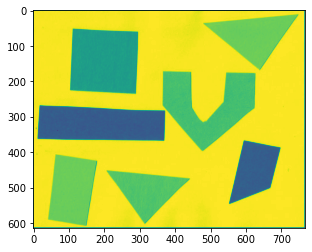

In [180]:
plt.imshow(blur_gray_junk)

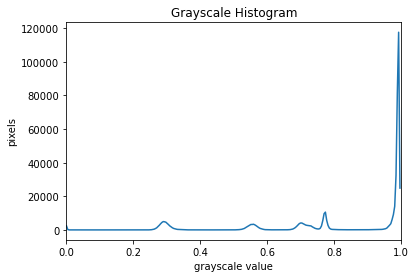

In [181]:
# create a histogram out of this image to find a threshold
# configure and draw the histogram figure
# this is the code to visualize gray scale histogram
plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("grayscale value")
plt.ylabel("pixels")
plt.xlim([0.0, 1.0])  # <- named arguments do not work here
histogram, bin_edges = np.histogram(blur_gray_junk, bins=256) # returns histogram (minus bin egdes) and bin edges
plt.plot(bin_edges[0:-1], histogram)  # <- or here
plt.show()
# in this case, the threshold can be set at 0.8.
# how to read this picture !!
# what I want to keep and what I want to disgard
# we want to discard pixels that are white (close to 1)! (I made a mistake in the class)
# keep all pixcels with gray scale < 0.8

In [182]:
# from the gray scale histogram, we set the threshold at 0.8, keep all pixels < 0.8 and disgard pixels > 0.8
mask = blur_gray_junk > 0.8

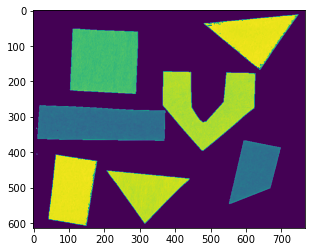

In [183]:
blur_gray_junk[mask] = 0 # set to black
plt.imshow(blur_gray_junk)

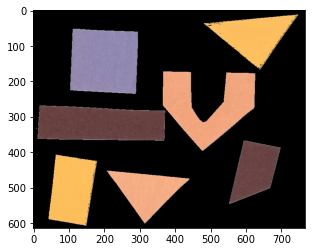

In [184]:
# you can also use the mask to mask the original image
junk[mask] = 0
plt.imshow(junk)

In [185]:
# answers to the question above:

In [186]:
# why should I assign False here, where False (0) is black
# the entire mask as black, which means
# mask = np.zeros(shape=image.shape[0:2], dtype='bool')
# mask[rr,cc] = True # why this is not going to work, or how you think you can make this reversed mask work?
# ****** please think about it!

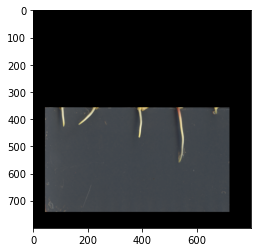

In [187]:
# we can do the following
# reload image
maize = skimage.io.imread(fname='img_processing_data/maize-roots.tif')
mask = np.zeros(shape=maize.shape[0:2], dtype='bool')
rr,cc = skimage.draw.rectangle(start = (357,44), end = (740, 720))
mask[rr,cc] = True
maize[mask==False]=0 # we will say, foxr pixels where mask value is False, assign the pixels as 0
# here, mask == False is another mask
plt.imshow(maize) # the same!
# masks are flexible, but the most important thing to remember is that we can only assign values to pixels where mask value is True